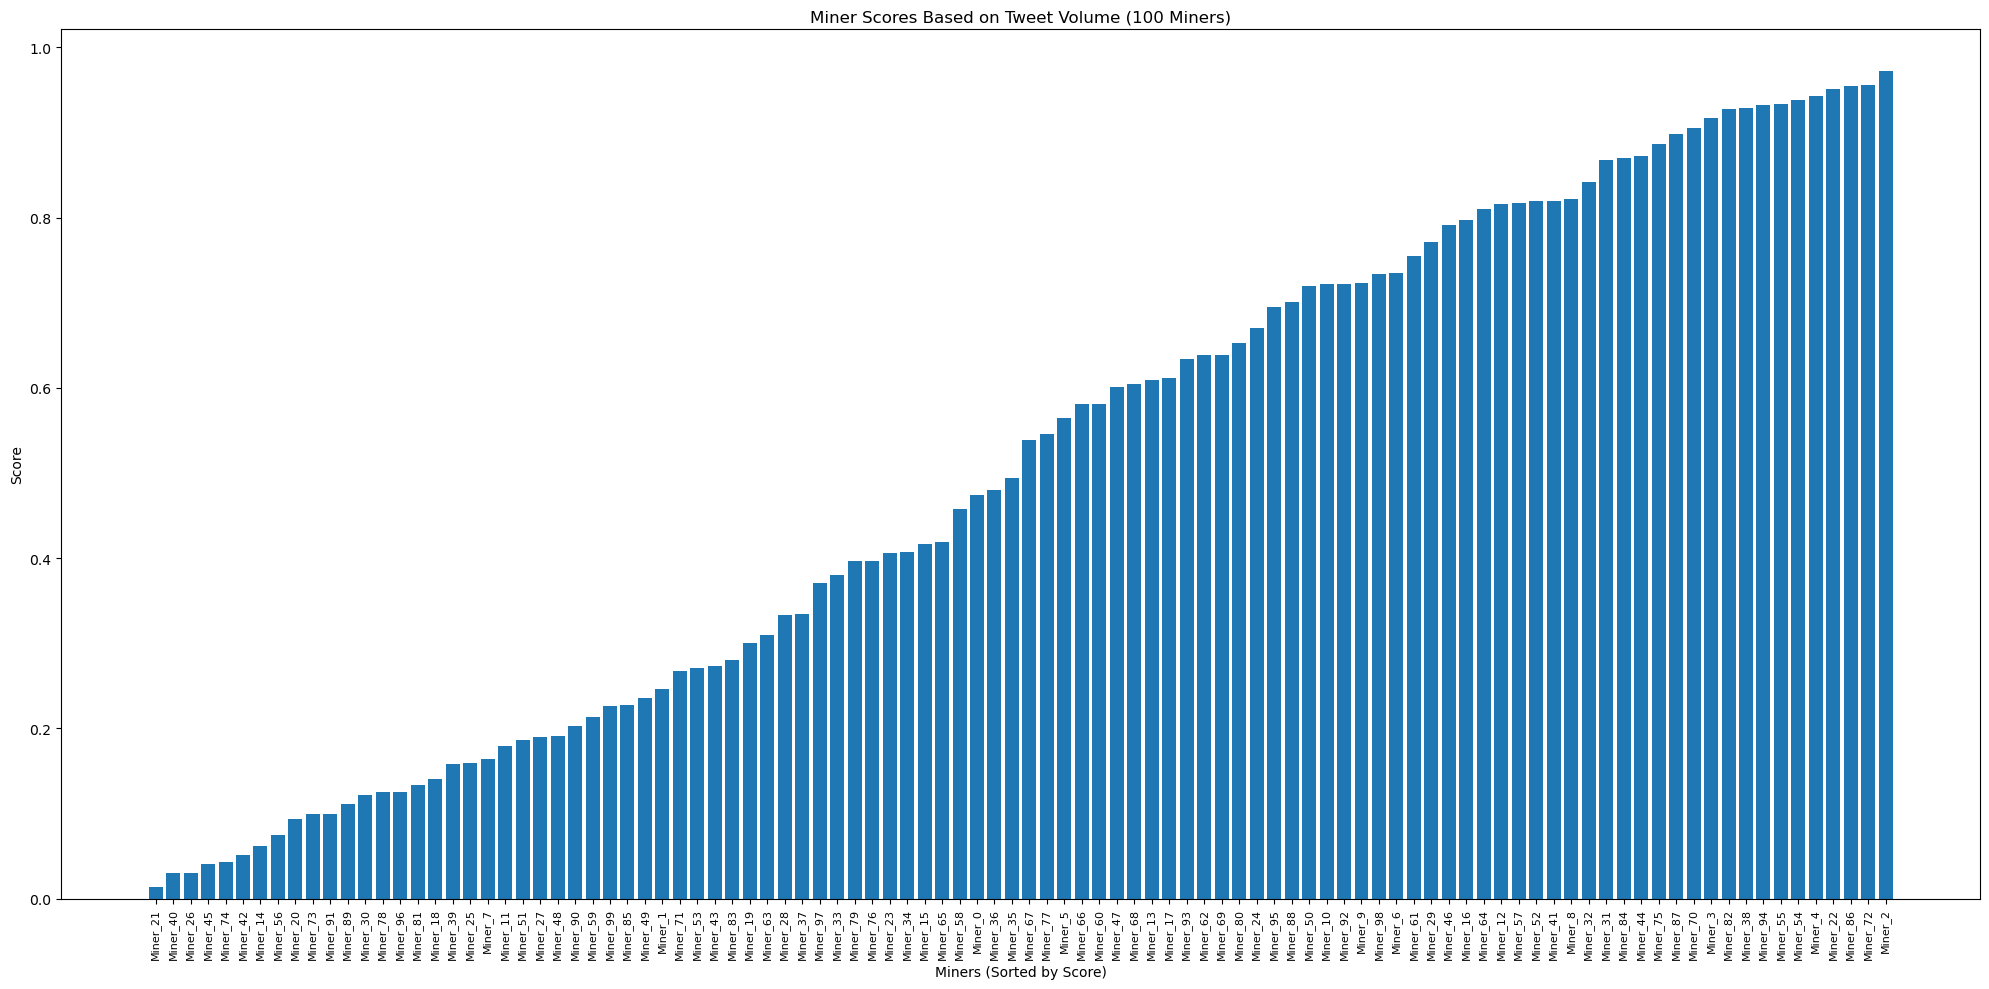

          Total Volume     Score
Miner_2    1306.275571  0.972484
Miner_72   1247.053482  0.956024
Miner_86   1242.792001  0.954584
Miner_22   1231.196561  0.950473
Miner_4    1212.858970  0.943371
...                ...       ...
Miner_74    292.040311  0.042948
Miner_45    285.102320  0.040725
Miner_26    248.484887  0.030492
Miner_40    245.277369  0.029708
Miner_21    153.207645  0.013374

[100 rows x 2 columns]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Simulate miner data
num_miners = 100
num_periods = 6

def generate_miner_data():
    base_volume = np.random.randint(50, 200)
    trend = np.random.uniform(-10, 10)
    noise = np.random.normal(0, 20, num_periods)
    volumes = base_volume + trend * np.arange(num_periods) + noise
    return np.maximum(volumes, 0)  # Ensure non-negative volumes

miner_data = {f"Miner_{i}": generate_miner_data() for i in range(num_miners)}
df = pd.DataFrame(miner_data)

# Calculate total volume per miner
total_volumes = df.sum()

# Scoring function
def kurtosis_based_score(volume, mean, std_dev, scale_factor=1.0):
    if std_dev == 0:
        return 0
    z_score = (volume - mean) / std_dev
    return stats.norm.cdf(z_score) * scale_factor

# Calculate scores
mean_volume = total_volumes.mean()
std_dev_volume = total_volumes.std()
scores = total_volumes.apply(lambda x: kurtosis_based_score(x, mean_volume, std_dev_volume))

# Sort scores in descending order
sorted_scores = scores.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 10))  # Increased figure size for better readability
plt.bar(range(len(sorted_scores))[::-1], sorted_scores.values)
plt.title("Miner Scores Based on Tweet Volume (100 Miners)")
plt.xlabel("Miners (Sorted by Score)")
plt.ylabel("Score")
plt.xticks(range(len(sorted_scores))[::-1], sorted_scores.index, rotation=90, ha='center', fontsize=8)
plt.tight_layout()
plt.show()

# Display data
result_df = pd.DataFrame({
    "Total Volume": total_volumes,
    "Score": scores
}).sort_values("Score", ascending=False)
print(result_df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f017507a-86ad-40cb-8efa-5587c78ee158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>